# Intro to Concurrency in Python (async , await and  asyncio)

asyncio is a library to write concurrent code using the async/await syntax.
It was introduced in python 3.4

### Synchronous code

synchronous means that you can only execute one task at a time.

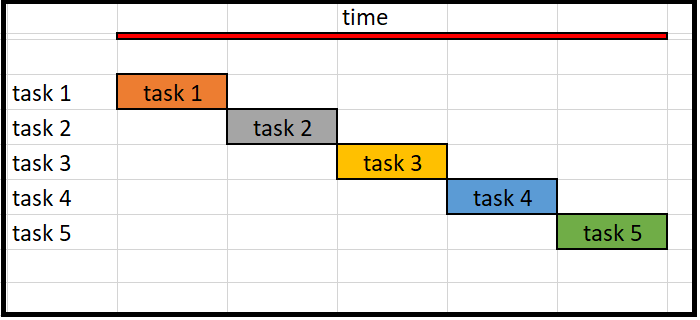

### Asynchronous / Concurrent code

Asynchronous means that you can run multiple tasks at same time `seemingly parallel`

concurrency vs parrallelism

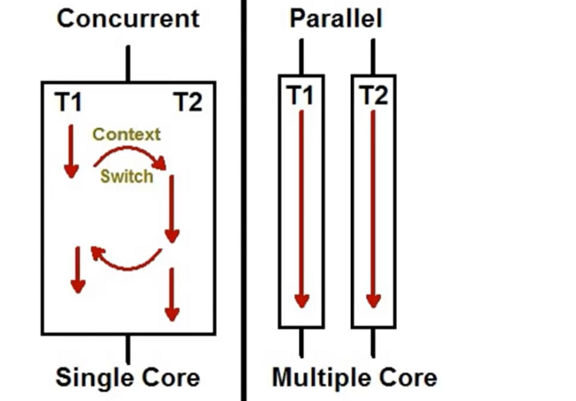

## How to write asynchronous programs using asyncio ?

function which can pause and resume its execution at any stage in its life cycle - `coroutine`

Lets write a function and convert it to coroutine.

In [1]:
def my_fun():
    print('hello world')

In [2]:
my_fun()

hello world


In [4]:
async def my_fun():
    print('hello world')

In [5]:
my_fun()

<coroutine object my_fun at 0x00000198FC2FD1C8>

In [6]:
await my_fun()

hello world


## How to execute coroutine:

The event loop is the core of every asyncio application. Event loops run asynchronous tasks and callbacks, perform network IO operations, and run subprocesses.

- asyncio.run() 
- await
- asyncio.gather()/ asyncio.create_task function to run coroutines concurrently

`

In [ ]:
# 3.5 V
# loop = asyncio.get_event_loop()

# loop.run_until_complete(coroutine_method))

# loop.close()

In [7]:
# synchronous 

import time
def count():
    time.sleep(1)
    print('1')
    time.sleep(1)
    print('2')
    time.sleep(1)
    print('3')

def main():
    count()
    count()
    count()

if __name__ == '__main__':
    t1 = time.perf_counter()
    main()
    t2 = time.perf_counter()
    print(t2-t1)

1
2
3
1
2
3
1
2
3
9.00438369999938


In [12]:
# Asynchronous 

import time
import asyncio

async def count():
#     await asyncio.sleep(1)
    time.sleep(1)
    print('1')
    time.sleep(1)
#     await asyncio.sleep(1)
    print('2')
    await asyncio.sleep(1)
    print('3')

async def main():
    t = asyncio.create_task(await count(),await count(),await count())
    await asyncio.gather(*t)
#     await count()
#     await count()
#     await count()

if __name__ == '__main__':
    t1 = time.perf_counter()
    await main()
#     asyncio.run(main())
    t2 = time.perf_counter()
    print(t2-t1)

1
2
3
1
2
3
1
2
3


TypeError: create_task() takes 1 positional argument but 3 were given

In [16]:
import time
import requests


URL = 'https://httpbin.org/uuid'


def fetch(session, url):
    with session.get(url) as response:
        print(response.json()['uuid'])



def mainA():
    with requests.Session() as session:
        for _ in range(20):
            fetch(session, URL)
mainA()

c4d4ca17-f110-4bcf-aa9b-22a4dbb83a37
1128f13d-a98e-404c-9ee5-4034f439002e
dbc8a038-15c4-4bfb-ad45-61c2d91becaa
b9008dee-9c0a-4070-a0a6-69f873ad8198
b04d63f6-eb12-4a30-8a40-17554208437a
b6fca1a8-80ee-44c0-a3e9-1da94f6adb4c
317f0bdb-8eaf-44ba-9188-cff9178f37c3
f071e0b7-0a2c-4b6f-81a3-5399fea39b42
3331efca-74de-44d5-a9db-86619c9f49d9
61d1c331-def1-4f4b-a137-afc9acf2661b
cc2b45e8-b1a6-4581-95eb-f5aa0f0d30e0
305b6d1b-77cf-46d2-bd24-b66415228f5e
35e4ee45-c7fd-4983-b798-5960c3576b68
5c5cf380-dfc5-4f74-8312-d9ebb0f4c2b5
034262a2-442b-4a7a-af4a-b21e53c06dd9
f104ba64-80d3-4e28-afde-e4708b9b24a9
d94d85fc-82e9-405a-9a96-488f4ae988af
6791e191-fd2e-4acd-b8ca-a8b6a7531b40
b8443a54-66c8-4244-a95d-4e0d71ac9dc8
0da0b219-2c56-4be0-95ba-2aa4004a944d
